<h1> Project Overview </h1>
For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

<h1> Business Problem </h1>
The company is expanding in to new industries to diversify its portfolio. Specifically, the are interested in purchasing and operating airplanes for commercial and private enterproses, but do not know anything about the potential risks of aircraft. I am charged with determining which aircrafy are the lowest risk for the company to start this new business endeavour. I must then translate my findings into actionable insights that the head of the new aviaton division can use to help decide which aircraft to purchase.

<h1> The Data </h1>
This is a dataset from the National Safety Board that includes aviation accident data from 1962-2023 about civil aviation accidents and selected incidents in the United States and International Waters. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AviationData.csv',  encoding="windows-1252")

<h2> Understanding the data </h2>

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.shape

(88889, 31)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

<h2> Data Cleaning </h2>

In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

General rules:

- < 5% Missing: Impute missing values unless the column is unimportant.
- 5–30% Missing: Impute if the column is critical; otherwise, consider dropping it.
- Greater 30% Missing: Typically, drop the column unless it's essential.


In [8]:
# Impute numerical data
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

# Impute categorical data
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0], inplace=True)
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0], inplace=True)
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0], inplace=True)
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)
df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0], inplace=True)
df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0], inplace=True)


In [9]:
cols_to_drop = ['Latitude', 'Longitude', 'Schedule','Air.carrier', 'FAR.Description','Registration.Number', 
                'Aircraft.Category', 'Airport.Name', 'Airport.Code', 'Accident.Number' ]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [10]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [11]:
df.shape

(88889, 21)

In [12]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                        92
Amateur.Built                 0
Number.of.Engines          6084
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6384
Publication.Date          13771
dtype: int64

In [13]:
# Fill missing values for categorical columns
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Report.Status'].fillna('Unknown', inplace=True)

# Impute missing values for numerical columns
df['Number.of.Engines'] = df.groupby(['Make', 'Model'])['Number.of.Engines'].transform(lambda x: x.fillna(x.median()))

# Impute or drop Publication.Date
df['Publication.Date'].fillna(df['Event.Date'], inplace=True)

# Verify remaining missing values
print(df.isnull().sum())


Event.Id                     0
Investigation.Type           0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Make                         0
Model                       92
Amateur.Built                0
Number.of.Engines         1783
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64


In [14]:
# Fill missing values for categorical columns
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Report.Status'].fillna('Unknown', inplace=True)

# Impute missing values for numerical columns
df['Number.of.Engines'] = df.groupby(['Make', 'Model'])['Number.of.Engines'].transform(lambda x: x.fillna(x.median()))

# Impute or drop Publication.Date
df['Publication.Date'].fillna(df['Event.Date'], inplace=True)

# Verify remaining missing values
print(df.isnull().sum())


Event.Id                     0
Investigation.Type           0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Make                         0
Model                       92
Amateur.Built                0
Number.of.Engines         1783
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64


In [15]:
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

In [16]:
df['Number.of.Engines'] = df.groupby(['Make', 'Model'])['Number.of.Engines'].transform(lambda x: x.fillna(x.median()))

In [19]:
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)

In [20]:
print(df.isnull().sum())

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


In [21]:
# Inspecting the data for anomalies
print(df['Model'].value_counts())
print(df['Number.of.Engines'].describe())

Model
152             2411
172             1759
172N            1164
PA-28-140        932
150              829
                ... 
747-2R7F           1
GC-1-A             1
737-3S3            1
MBB-BK117-B2       1
M-8 EAGLE          1
Name: count, Length: 12318, dtype: int64
count    88889.000000
mean         1.154907
std          0.467461
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64


In [22]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

<h2> Data Analysis </h2>

<h3> Based on the business problem, here are the key questions we aim to answer: </h3>

1. Aircraft Safety: Which aircraft models and makes are associated with the least accidents or fatalities?
2. Flight Phases: During which phases of flight (e.g., takeoff, landing) do most accidents occur?
3. Weather Conditions: How does weather influence accident severity?
4. Geographic Insights: Are there high-risk locations or countries for aviation incidents?
5. Engine Type and Count: Are specific engine types or counts linked to higher accident rates?


In [24]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object

In [27]:
# Previewing the Data
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948-10-24
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Location                88889 non-null  object        
 4   Country                 88889 non-null  object        
 5   Injury.Severity         88889 non-null  object        
 6   Aircraft.damage         88889 non-null  object        
 7   Make                    88889 non-null  object        
 8   Model                   88889 non-null  object        
 9   Amateur.Built           88889 non-null  object        
 10  Number.of.Engines       88889 non-null  float64       
 11  Engine.Type             88889 non-null  object        
 12  Purpose.of.flight       88889 non-null  object

In [31]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.154907,0.564761,0.240491,0.309127,4.971245
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.467461,5.126649,1.434614,2.083715,27.002011


In [32]:
# Concerting the time datatype
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [33]:
df['Year'] = df['Event.Date'].dt.year

<h2> Accidents Over Time </h2>

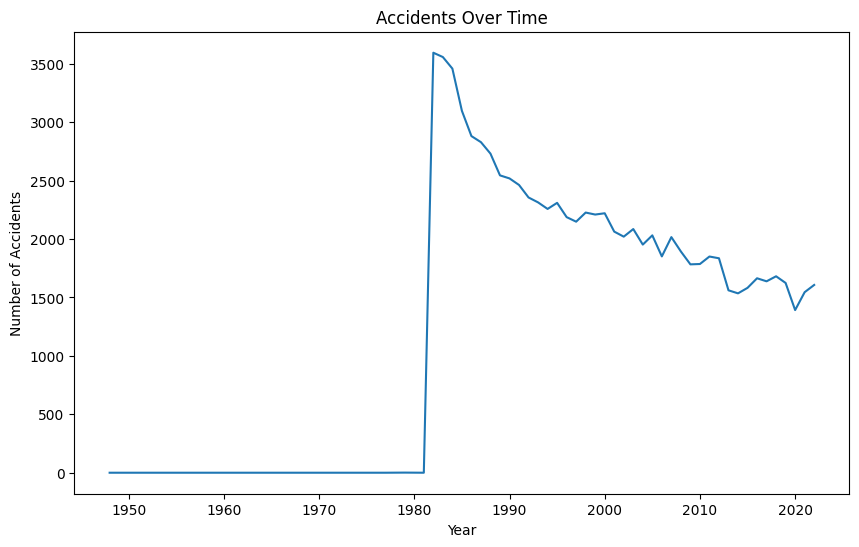

In [36]:
accidents_by_year = df['Year'].value_counts().sort_index()

accidents_by_year.plot(kind='line', figsize=(10, 6), title='Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h2> Accidents By Country </h2>

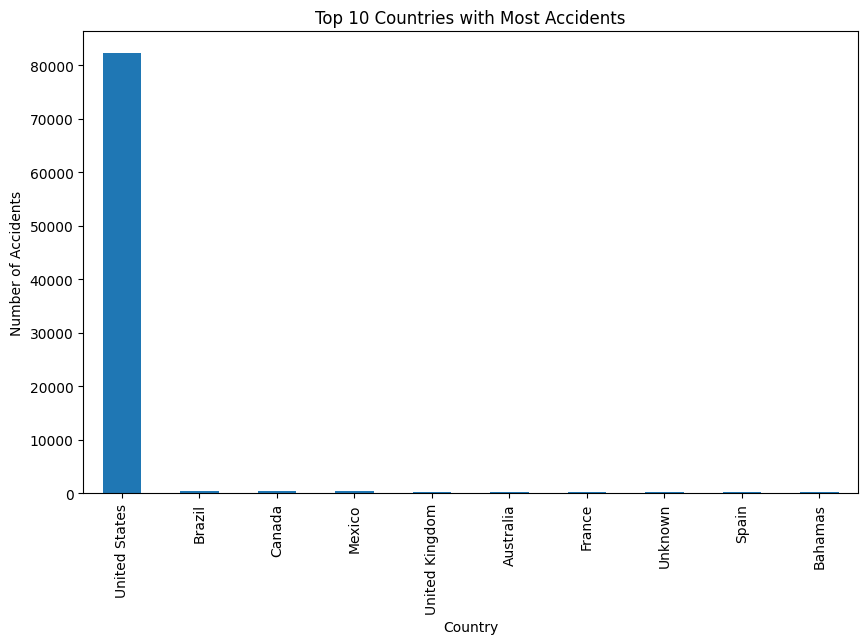

In [37]:
accidents_by_country = df['Country'].value_counts().head(10)
accidents_by_country.plot(kind='bar', figsize=(10, 6), title='Top 10 Countries with Most Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.show()

<h2> Injury Severity Distribution </h2>

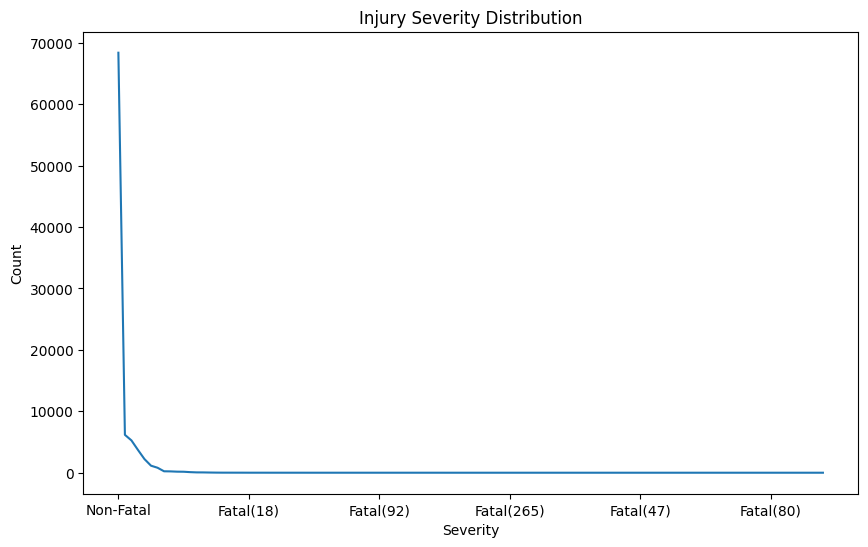

In [39]:
injury_severity_counts = df['Injury.Severity'].value_counts()
injury_severity_counts.plot(kind='line', figsize=(10, 6), title='Injury Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

<h2> Fatal Injuries Analysis </h2>

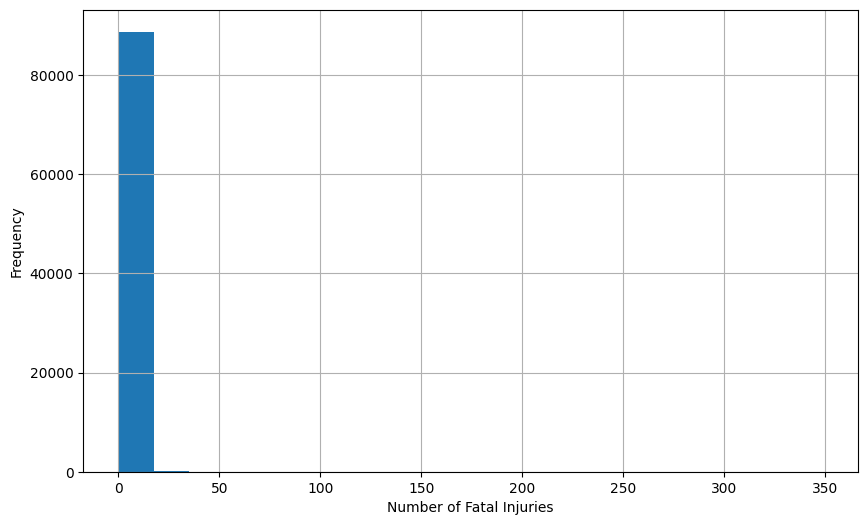

In [41]:
fatal_injuries = df['Total.Fatal.Injuries'].astype(int)
fatal_injuries.hist(bins=20, figsize=(10, 6))
plt.xlabel('Number of Fatal Injuries')
plt.ylabel('Frequency')
plt.show()

<h2> Aircraft Details </h2>

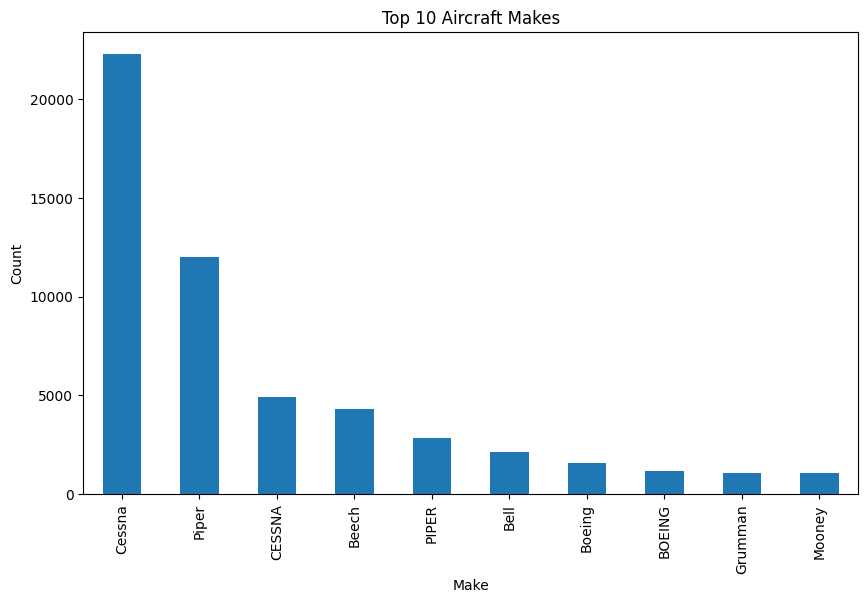

In [42]:
top_makes = df['Make'].value_counts().head(10)
top_makes.plot(kind='bar', figsize=(10, 6), title='Top 10 Aircraft Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

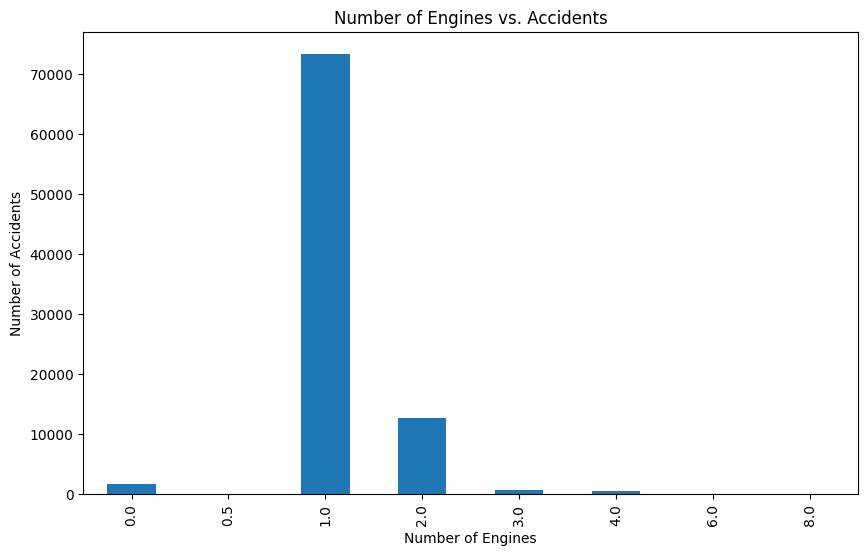

In [43]:
engines_vs_accidents = df['Number.of.Engines'].value_counts().sort_index()
engines_vs_accidents.plot(kind='bar', figsize=(10, 6), title='Number of Engines vs. Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.show()

<h2> Weather and Flight Phase </h2>

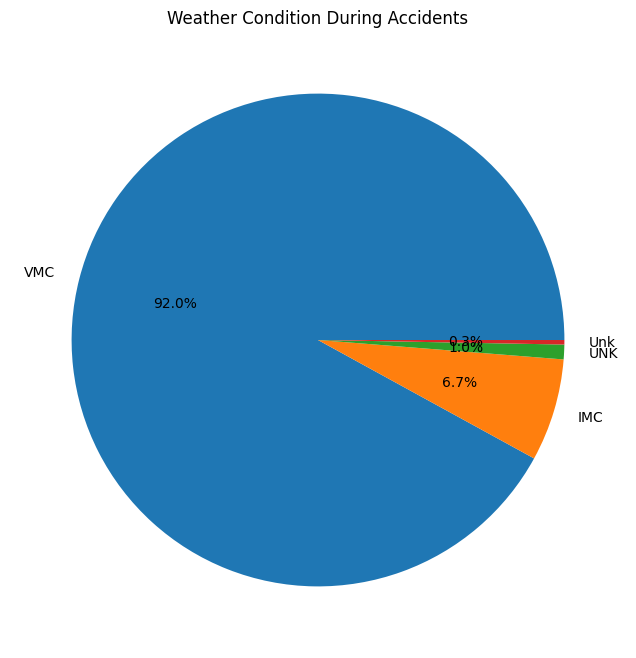

In [44]:
weather_conditions = df['Weather.Condition'].value_counts()
weather_conditions.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title='Weather Condition During Accidents')
plt.ylabel('')
plt.show()

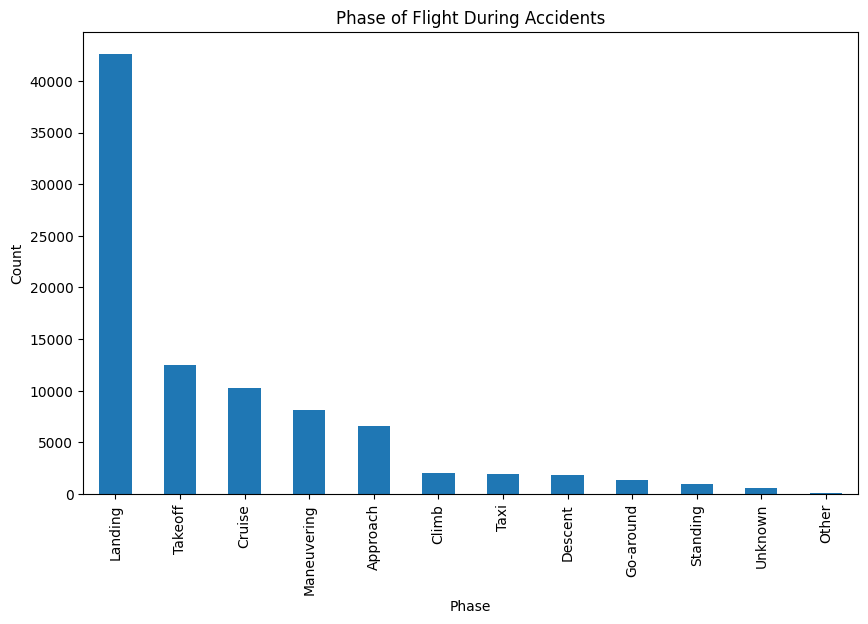

In [45]:
flight_phases = df['Broad.phase.of.flight'].value_counts()
flight_phases.plot(kind='bar', figsize=(10, 6), title='Phase of Flight During Accidents')
plt.xlabel('Phase')
plt.ylabel('Count')
plt.show()

<h2> Risk Identification </h2>

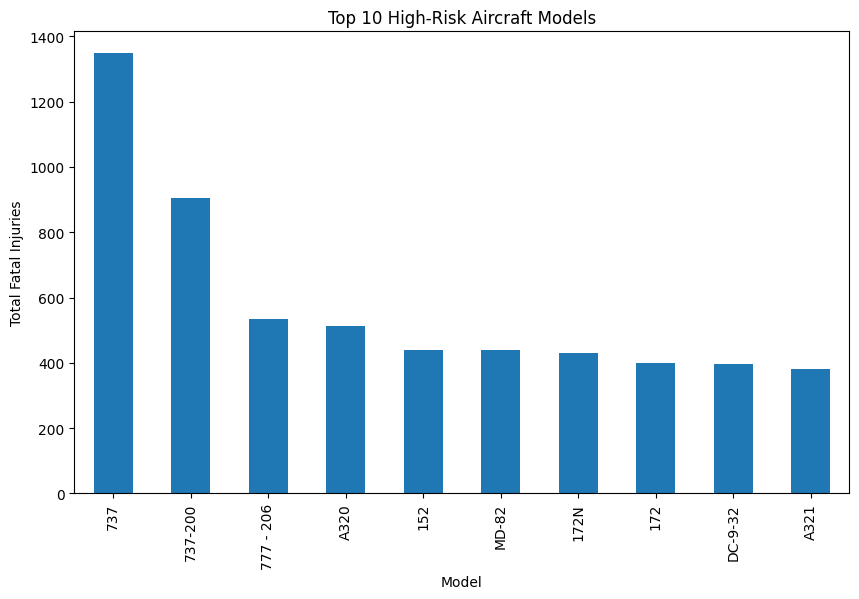

In [46]:
high_risk_models = df.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
high_risk_models.plot(kind='bar', figsize=(10, 6), title='Top 10 High-Risk Aircraft Models')
plt.xlabel('Model')
plt.ylabel('Total Fatal Injuries')
plt.show()

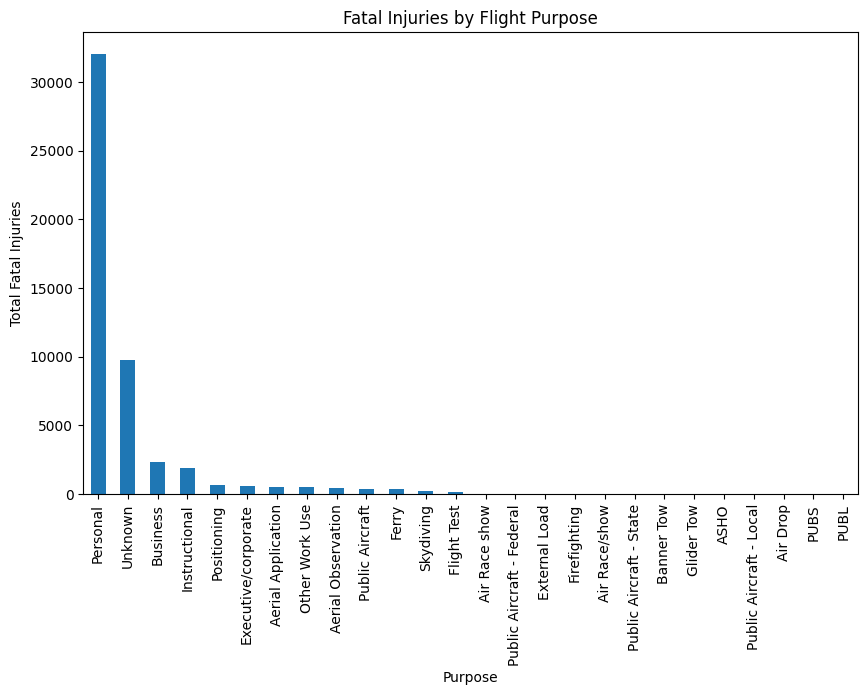

In [47]:
purpose_risk = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
purpose_risk.plot(kind='bar', figsize=(10, 6), title='Fatal Injuries by Flight Purpose')
plt.xlabel('Purpose')
plt.ylabel('Total Fatal Injuries')
plt.show()

In [48]:
pip install plotly dash

Note: you may need to restart the kernel to use updated packages.
  Using cached dash_html_components-2.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------


[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------------

In [49]:
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value='United States'
    ),
    dcc.Graph(id='accidents-by-year')
])

@app.callback(
    Output('accidents-by-year', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered_df = df[df['Country'] == selected_country]
    accidents_by_year = filtered_df['Year'].value_counts().sort_index()
    return px.line(x=accidents_by_year.index, y=accidents_by_year.values, title=f'Accidents Over Time in {selected_country}')

if __name__ == '__main__':
    app.run_server(debug=True)
